## 한국관광 2010 - 2019

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
df = pd.read_excel('ktour_2010_2019.xlsx', header = 1, skipfooter= 3, 
                   usecols = 'A:E, G:I, K, M, O',
                   names = ['연도', '월', '대륙', '국적', '계', '관광', '전체비율(%)', '상용', '공용', '유학연수', '기타'])
df.head(20)

In [ ]:
df.tail(3)

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타
7689,NaN,NaN,기타 소계,NaN,72,44.0,0.0,3.0,NaN,NaN,25.0
7690,NaN,NaN,교포,교포,18788,NaN,NaN,NaN,NaN,NaN,18788.0
7691,NaN,NaN,교포 소계,NaN,18788,NaN,NaN,NaN,NaN,NaN,18788.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       19 non-null     object 
 1   월        225 non-null    object 
 2   대륙       1582 non-null   object 
 3   국적       6780 non-null   object 
 4   계        7692 non-null   int64  
 5   관광       7466 non-null   float64
 6   전체비율(%)  7466 non-null   float64
 7   상용       7387 non-null   float64
 8   공용       6435 non-null   float64
 9   유학연수     7220 non-null   float64
 10  기타       7661 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 661.2+ KB


### 전처리

In [ ]:
df['연도'].fillna(method = 'ffill', inplace = True) #위에껄로 채우기
df['월'].fillna(method = 'ffill', inplace = True)
df['대륙'].fillna(method = 'ffill', inplace = True)
df.head()

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,nan-nan
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,nan-nan
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,NaN,21.0,595.0,nan-nan
4,2010,01,아시아,마카오,554,554.0,0.14,NaN,NaN,NaN,NaN,nan-nan


In [ ]:
df['기준연월'] = df['연도'].astype(str) + '-' + df['월'].astype(str)
df.head()


,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,NaN,21.0,595.0,2010-01
4,2010,01,아시아,마카오,554,554.0,0.14,NaN,NaN,NaN,NaN,2010-01


In [ ]:
df['국적'].unique()

array(['중국', '일본', '대만', '홍콩', '마카오', '필리핀', '인도네시아', '태국', '베트남', '인도',
       '말레이시아', '싱가포르', '몽골', '우즈베키스탄', '미얀마', 'GCC', '카자흐스탄', '터키',
       '캄보디아', '스리랑카', '방글라데시', '파키스탄', '이스라엘', '이란', '아시아 기타', nan, '미국',
       '캐나다', '브라질', '멕시코', '아메리카 기타', '러시아', '영국', '독일', '프랑스', '이탈리아',
       '네덜란드', '우크라이나', '스페인', '루마니아', '노르웨이', '스웨덴', '폴란드', '스위스',
       '포르투갈', '오스트리아', '핀란드', '벨기에', '크로아티아', '그리스', '불가리아', '덴마크',
       '아일랜드', '유럽 기타', '오스트레일리아', '뉴질랜드', '오세아니아 기타', '남아프리카공화국',
       '아프리카 기타', '국적미상', '교포'], dtype=object)

In [ ]:
len(df['국적'].unique())

61

In [ ]:
df['대륙'].unique()

array(['아시아', nan, '아시아 소계', '아메리카', '아메리카 소계', '유럽', '유럽 소계', '오세아니아',
       '오세아니아 소계', '아프리카', '아프리카 소계', '기타', '기타 소계', '교포', '교포 소계'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   연도       19 non-null     object 
 1   월        225 non-null    object 
 2   대륙       1582 non-null   object 
 3   국적       6780 non-null   object 
 4   계        7692 non-null   int64  
 5   관광       7466 non-null   float64
 6   전체비율(%)  7466 non-null   float64
 7   상용       7387 non-null   float64
 8   공용       6435 non-null   float64
 9   유학연수     7220 non-null   float64
 10  기타       7661 non-null   float64
 11  기준연월     7692 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 721.2+ KB


In [ ]:
# 소계 제거 2

c_list = ['아시아', '아메리카', '유럽', '오세아니아', '아프리카', '기타', '교포']

In [ ]:
# 소계 제거

lst = list(df['대륙'].unique())
lst_new = []

for i in lst:
    if i.find('소계') == -1 :
        lst_new.append(i)

lst_new

AttributeError: ignored

In [ ]:
# 소계 제거

condition = (df['대륙'].isin(c_list) == True)
df_country = df[condition]
df_country

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,NaN,21.0,595.0,2010-01
4,2010,01,아시아,마카오,554,554.0,0.14,NaN,NaN,NaN,NaN,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7683,2019,05,오세아니아,오세아니아 기타,638,499.0,0.04,2.0,10.0,6.0,121.0,2019-05
7685,2019,05,아프리카,남아프리카공화국,1064,513.0,0.04,9.0,7.0,2.0,533.0,2019-05
7686,2019,05,아프리카,아프리카 기타,3214,1208.0,0.10,578.0,72.0,93.0,1263.0,2019-05
7688,2019,05,기타,국적미상,72,44.0,0.00,3.0,NaN,NaN,25.0,2019-05


In [ ]:
df_country['대륙'].unique()

array(['아시아', '아메리카', '유럽', '오세아니아', '아프리카', '기타', '교포'], dtype=object)

In [ ]:
# null 값 없애기

df_country = df_country.fillna(0)
df_country

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,0.0,21.0,595.0,2010-01
4,2010,01,아시아,마카오,554,554.0,0.14,0.0,0.0,0.0,0.0,2010-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7683,2019,05,오세아니아,오세아니아 기타,638,499.0,0.04,2.0,10.0,6.0,121.0,2019-05
7685,2019,05,아프리카,남아프리카공화국,1064,513.0,0.04,9.0,7.0,2.0,533.0,2019-05
7686,2019,05,아프리카,아프리카 기타,3214,1208.0,0.10,578.0,72.0,93.0,1263.0,2019-05
7688,2019,05,기타,국적미상,72,44.0,0.00,3.0,0.0,0.0,25.0,2019-05


In [ ]:
df_country

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
26,0,0,아메리카,미국,43065,26943.0,6.72,1195.0,2145.0,135.0,12647.0,nan-nan
32,0,0,유럽,러시아,10873,4861.0,1.21,505.0,15.0,83.0,5409.0,nan-nan
56,0,0,오세아니아,오스트레일리아,8431,6974.0,1.74,340.0,9.0,10.0,1098.0,nan-nan
60,0,0,아프리카,남아프리카공화국,788,214.0,0.05,27.0,0.0,2.0,545.0,nan-nan
...,...,...,...,...,...,...,...,...,...,...,...,...
7657,0,0,유럽,러시아,32955,24861.0,2.02,165.0,39.0,87.0,7803.0,nan-nan
7681,0,0,오세아니아,오스트레일리아,13558,12114.0,0.98,77.0,46.0,50.0,1271.0,nan-nan
7685,0,0,아프리카,남아프리카공화국,1064,513.0,0.04,9.0,7.0,2.0,533.0,nan-nan
7688,0,0,기타,국적미상,72,44.0,0.00,3.0,0.0,0.0,25.0,nan-nan


In [ ]:
k = (df_country['기준연월'] == '2019-01')
df_201901 = df_country[k]
df_201901

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
7353,2019,01,아시아,중국,392814,320113.0,36.20,2993.0,138.0,8793.0,60777.0,2019-01
7354,2019,01,아시아,일본,206526,198805.0,22.48,2233.0,127.0,785.0,4576.0,2019-01
7355,2019,01,아시아,대만,87954,86393.0,9.77,74.0,22.0,180.0,1285.0,2019-01
7356,2019,01,아시아,홍콩,35896,34653.0,3.92,59.0,2.0,90.0,1092.0,2019-01
7357,2019,01,아시아,마카오,2570,2506.0,0.28,2.0,0.0,17.0,45.0,2019-01
7358,2019,01,아시아,필리핀,30473,14279.0,1.61,211.0,161.0,184.0,15638.0,2019-01
7359,2019,01,아시아,인도네시아,18842,14183.0,1.60,136.0,38.0,187.0,4298.0,2019-01
7360,2019,01,아시아,태국,41334,34004.0,3.85,37.0,199.0,96.0,6998.0,2019-01
7361,2019,01,아시아,베트남,20183,10739.0,1.21,763.0,110.0,1667.0,6904.0,2019-01
7362,2019,01,아시아,인도,8671,2318.0,0.26,2656.0,46.0,177.0,3474.0,2019-01


In [ ]:
df_201901_new = df_201901.reset_index(drop = True)
df_201901_new

In [ ]:
# 비율계산

df_201901_new['관광객비율(%)'] = round(df_201901_new['관광']/df_201901_new['계']*100, 2)

In [ ]:
# 대륙별 관광객비율: pivot .table 

df_201901_new.pivot_table(values = '관광객비율(%)', index = '대륙', 
                          aggfunc = 'mean')

,관광객비율(%)
대륙,
교포,0.000000
기타,61.110000
아메리카,68.196000
아시아,59.618800
아프리카,32.675000
오세아니아,84.806667
유럽,63.823043


In [ ]:
df_201901_new.head()

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%)
0,2019,01,아시아,중국,392814,320113.0,36.2,2993.0,138.0,8793.0,60777.0,2019-01,81.49


In [ ]:
df_201901_new.sort_values('관광객비율(%)', ascending= False).head()

In [ ]:
df_201901_new.to_excel('./201901관광객.xlsx', index = False)

In [ ]:
# 일본국적

df_201901_new[df_201901_new['국적']=='일본']

### 따로해보기

In [ ]:
df_country.head()

In [ ]:
k = (df_country['국적'] == '중국')
df_china = df_country[k]
df_china

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
68,2010,02,아시아,중국,140571,60590.0,13.57,7907.0,68.0,29546.0,42460.0,2010-02
136,2010,03,아시아,중국,141457,50330.0,9.23,13549.0,174.0,14924.0,62480.0,2010-03
204,2010,04,아시아,중국,147680,84252.0,15.51,13306.0,212.0,2199.0,47711.0,2010-04
272,2010,05,아시아,중국,154066,89056.0,16.95,12325.0,360.0,2931.0,49394.0,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...
7353,2019,01,아시아,중국,392814,320113.0,36.20,2993.0,138.0,8793.0,60777.0,2019-01
7421,2019,02,아시아,중국,453379,324291.0,35.72,2694.0,143.0,38731.0,87520.0,2019-02
7489,2019,03,아시아,중국,487623,369165.0,29.49,3933.0,414.0,32532.0,81579.0,2019-03
7557,2019,04,아시아,중국,493250,410542.0,29.69,3575.0,362.0,9959.0,68812.0,2019-04


In [ ]:
df_china_new = df_china.reset_index(drop = True)
df_china_new.index = df_china_new.index +1
df_china_new

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
1,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
2,2010,02,아시아,중국,140571,60590.0,13.57,7907.0,68.0,29546.0,42460.0,2010-02
3,2010,03,아시아,중국,141457,50330.0,9.23,13549.0,174.0,14924.0,62480.0,2010-03
4,2010,04,아시아,중국,147680,84252.0,15.51,13306.0,212.0,2199.0,47711.0,2010-04
5,2010,05,아시아,중국,154066,89056.0,16.95,12325.0,360.0,2931.0,49394.0,2010-05
...,...,...,...,...,...,...,...,...,...,...,...,...
109,2019,01,아시아,중국,392814,320113.0,36.20,2993.0,138.0,8793.0,60777.0,2019-01
110,2019,02,아시아,중국,453379,324291.0,35.72,2694.0,143.0,38731.0,87520.0,2019-02
111,2019,03,아시아,중국,487623,369165.0,29.49,3933.0,414.0,32532.0,81579.0,2019-03
112,2019,04,아시아,중국,493250,410542.0,29.69,3575.0,362.0,9959.0,68812.0,2019-04


In [ ]:
# 비율계산

df_china_new['관광객비율(%)'] = round(df_china_new['관광']/df_china_new['계']*100, 2)

In [ ]:
df_china_new.head()

In [ ]:

df_china_new['기준연월'] = pd.to_datetime(df_china_new['기준연월'])

In [ ]:
df_china_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 1 to 113
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   연도        113 non-null    int64         
 1   월         113 non-null    object        
 2   대륙        113 non-null    object        
 3   국적        113 non-null    object        
 4   계         113 non-null    int64         
 5   관광        113 non-null    float64       
 6   전체비율(%)   113 non-null    float64       
 7   상용        113 non-null    float64       
 8   공용        113 non-null    float64       
 9   유학연수      113 non-null    float64       
 10  기타        113 non-null    float64       
 11  기준연월      113 non-null    datetime64[ns]
 12  관광객비율(%)  113 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(3)
memory usage: 11.6+ KB


## visualisation

In [ ]:
# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


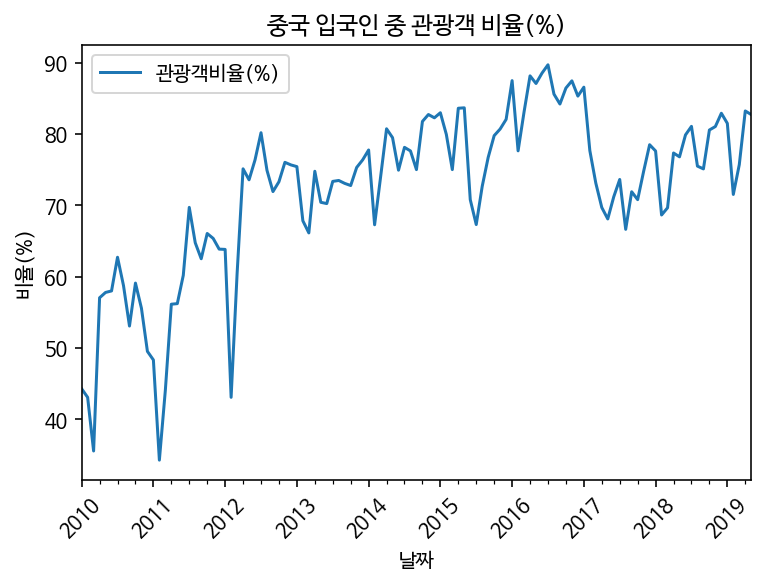

In [ ]:
x = df_china_new.plot.line(y='관광객비율(%)', x='기준연월', rot=45,
                ylabel = '비율(%)', xlabel = '날짜', 
                title = '중국 입국인 중 관광객 비율(%)')


In [ ]:
df_china_new.to_excel('./중국인관광객20102019.xlsx', index = False)

## visualization 2: during the lecture

In [ ]:
import pandas as pd

df_china_new = pd.read_excel('중국인관광객20102019.xlsx')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = 'AppleGothic'

<function matplotlib.pyplot.show>

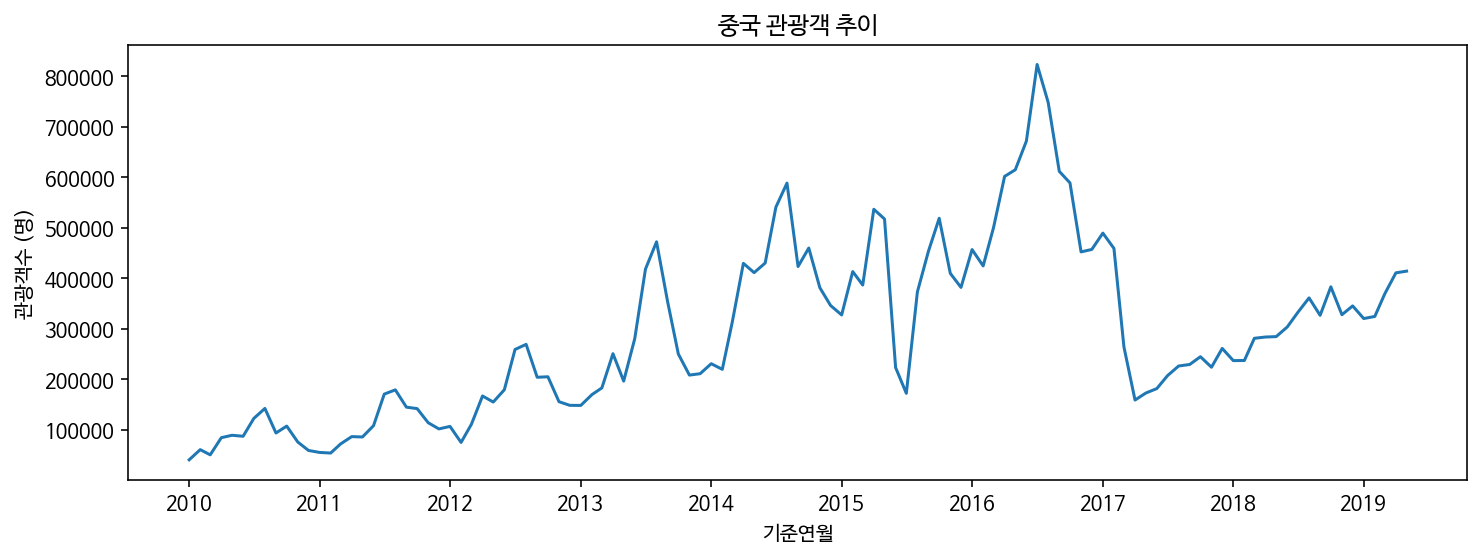

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(df_china_new['기준연월'], df_china_new['관광'])
plt.xlabel('기준연월')
plt.ylabel('관광객수 (명)')
plt.title('중국 관광객 추이')
plt.show

In [ ]:
df_china_new.head()

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%)
0,2010,1,아시아,중국,91252,40425,10.09,11930,55,2751,36091,2010-01-01,44.30
1,2010,2,아시아,중국,140571,60590,13.57,7907,68,29546,42460,2010-02-01,43.10
2,2010,3,아시아,중국,141457,50330,9.23,13549,174,14924,62480,2010-03-01,35.58
3,2010,4,아시아,중국,147680,84252,15.51,13306,212,2199,47711,2010-04-01,57.05
4,2010,5,아시아,중국,154066,89056,16.95,12325,360,2931,49394,2010-05-01,57.80


### top 5 

### 두번째 이것저것

In [ ]:
df_country.head()

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,0.0,21.0,595.0,2010-01
4,2010,01,아시아,마카오,554,554.0,0.14,0.0,0.0,0.0,0.0,2010-01


In [ ]:
# 비율계산
df_country['관광객비율(%)'] = round(df_country['관광']/df_country['계']*100, 2)
df_country

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%)
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01,44.30
1,2010,01,아시아,일본,209184,202825.0,50.60,1750.0,89.0,549.0,3971.0,2010-01,96.96
2,2010,01,아시아,대만,36399,35788.0,8.93,41.0,17.0,37.0,516.0,2010-01,98.32
3,2010,01,아시아,홍콩,14545,13874.0,3.46,55.0,0.0,21.0,595.0,2010-01,95.39
4,2010,01,아시아,마카오,554,554.0,0.14,0.0,0.0,0.0,0.0,2010-01,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683,2019,05,오세아니아,오세아니아 기타,638,499.0,0.04,2.0,10.0,6.0,121.0,2019-05,78.21
7685,2019,05,아프리카,남아프리카공화국,1064,513.0,0.04,9.0,7.0,2.0,533.0,2019-05,48.21
7686,2019,05,아프리카,아프리카 기타,3214,1208.0,0.10,578.0,72.0,93.0,1263.0,2019-05,37.59
7688,2019,05,기타,국적미상,72,44.0,0.00,3.0,0.0,0.0,25.0,2019-05,61.11


In [ ]:

df_country['기준연월'] = pd.to_datetime(df_country['기준연월'])


In [ ]:
#국가별 관광객/전체 관광객 
#tourist_sum = sum(kt_201901_newindex['관광'])
#tourist_sum

#kt_201901_newindex['관광비율2'] = round(kt_201901_newindex['관광']/tourist_sum*100,1)
#kt_201901_newindex.head()

In [ ]:
k = (df_country['국적'] == '중국')
df_china = df_country[k]
df_china

,연도,월,대륙,국적,계,관광,전체비율(%),상용,공용,유학연수,기타,기준연월,관광객비율(%)
0,2010,01,아시아,중국,91252,40425.0,10.09,11930.0,55.0,2751.0,36091.0,2010-01-01,44.30
68,2010,02,아시아,중국,140571,60590.0,13.57,7907.0,68.0,29546.0,42460.0,2010-02-01,43.10
136,2010,03,아시아,중국,141457,50330.0,9.23,13549.0,174.0,14924.0,62480.0,2010-03-01,35.58
204,2010,04,아시아,중국,147680,84252.0,15.51,13306.0,212.0,2199.0,47711.0,2010-04-01,57.05
272,2010,05,아시아,중국,154066,89056.0,16.95,12325.0,360.0,2931.0,49394.0,2010-05-01,57.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,2019,01,아시아,중국,392814,320113.0,36.20,2993.0,138.0,8793.0,60777.0,2019-01-01,81.49
7421,2019,02,아시아,중국,453379,324291.0,35.72,2694.0,143.0,38731.0,87520.0,2019-02-01,71.53
7489,2019,03,아시아,중국,487623,369165.0,29.49,3933.0,414.0,32532.0,81579.0,2019-03-01,75.71
7557,2019,04,아시아,중국,493250,410542.0,29.69,3575.0,362.0,9959.0,68812.0,2019-04-01,83.23


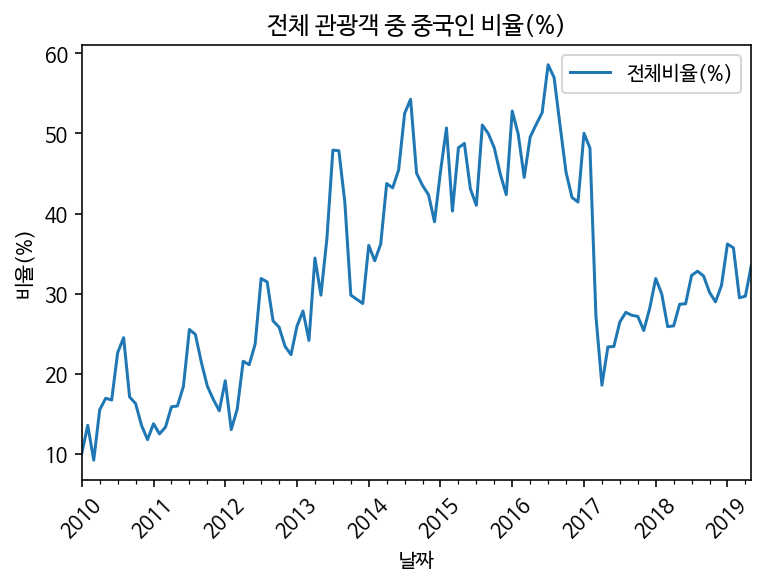

In [ ]:
y = df_china.plot.line(y='전체비율(%)', x='기준연월', rot=45,
                title = '전체 관광객 중 중국인 비율(%)', ylabel = '비율(%)',xlabel = '날짜')